In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded files
pokemon_df = pd.read_csv('pokemon.csv')
combats_df = pd.read_csv('combats.csv')

# Display the first few rows of each dataframe to understand their structure
pokemon_df.head(), combats_df.head()

(   #           Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
 0  1      Bulbasaur  Grass  Poison  45      49       49       65       65   
 1  2        Ivysaur  Grass  Poison  60      62       63       80       80   
 2  3       Venusaur  Grass  Poison  80      82       83      100      100   
 3  4  Mega Venusaur  Grass  Poison  80     100      123      122      120   
 4  5     Charmander   Fire     NaN  39      52       43       60       50   
 
    Speed  Generation  Legendary  
 0     45           1      False  
 1     60           1      False  
 2     80           1      False  
 3     80           1      False  
 4     65           1      False  ,
    First_pokemon  Second_pokemon  Winner
 0            266             298     298
 1            702             701     701
 2            191             668     668
 3            237             683     683
 4            151             231     151)

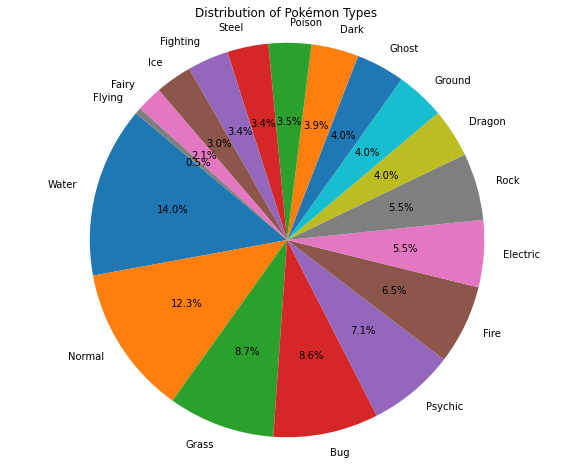

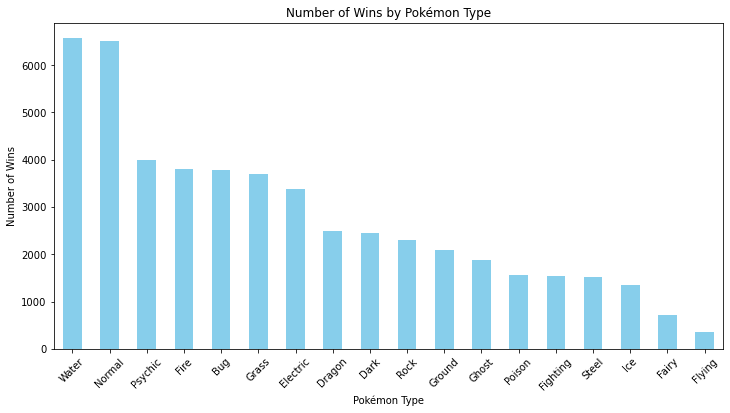

In [21]:
# Merge the datasets
# First, let's rename the columns in pokemon_df for merging purposes
pokemon_df.rename(columns={'#': 'Pokemon_ID'}, inplace=True)

# Merge combats_df with pokemon_df for both First_pokemon and Second_pokemon to get their types
combats_with_types = combats_df.merge(pokemon_df[['Pokemon_ID', 'Type 1', 'Type 2']],
                                      left_on='First_pokemon', right_on='Pokemon_ID',
                                      suffixes=('_First', '_Second')).drop(columns='Pokemon_ID')

combats_with_types = combats_with_types.merge(pokemon_df[['Pokemon_ID', 'Type 1', 'Type 2']],
                                              left_on='Second_pokemon', right_on='Pokemon_ID',
                                              suffixes=('_First', '_Second')).drop(columns='Pokemon_ID')

# Extract only the necessary columns for analysis
combats_with_types = combats_with_types[['First_pokemon', 'Second_pokemon', 'Winner', 'Type 1_First', 'Type 1_Second']]

# Calculate the distribution of Pokémon types
type_distribution = pokemon_df['Type 1'].value_counts()

# Calculate the number of wins by Pokémon type
wins_by_type = combats_with_types.merge(pokemon_df[['Pokemon_ID', 'Type 1']], left_on='Winner', right_on='Pokemon_ID')
wins_by_type_count = wins_by_type['Type 1'].value_counts()



# Plot a pie chart for the distribution of Pokémon types
plt.figure(figsize=(10, 8))
plt.pie(type_distribution, labels=type_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pokémon Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Plot a bar graph for the number of wins by Pokémon type
plt.figure(figsize=(12, 6))
wins_by_type_count.plot(kind='bar', color='skyblue')
plt.title('Number of Wins by Pokémon Type')
plt.xlabel('Pokémon Type')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


In [32]:
# Group by generation and find the max and min values for HP, Attack, and Defense
max_min_stats = pokemon_df.groupby('Generation').apply(
    lambda x: pd.Series({
        'Max HP': x.loc[x['HP'].idxmax()]['Name'],
        'Min HP': x.loc[x['HP'].idxmin()]['Name'],
        'Max Attack': x.loc[x['Attack'].idxmax()]['Name'],
        'Min Attack': x.loc[x['Attack'].idxmin()]['Name'],
        'Max Defense': x.loc[x['Defense'].idxmax()]['Name'],
        'Min Defense': x.loc[x['Defense'].idxmin()]['Name'],
    })
).reset_index()

print(max_min_stats)

   Generation     Max HP    Min HP           Max Attack Min Attack  \
0           1    Chansey   Diglett        Mega Mewtwo X    Chansey   
1           2    Blissey     Pichu       Mega Heracross    Shuckle   
2           3    Wailord  Shedinja       Primal Groudon     Feebas   
3           4   Drifblim  Mime Jr.        Mega Garchomp    Happiny   
4           5  Alomomola  Venipede  Kyurem Black Kyurem      Munna   
5           6    Xerneas  Bunnelby         Mega Diancie     Spewpa   

    Max Defense Min Defense  
0  Mega Slowbro     Chansey  
1  Mega Steelix     Blissey  
2   Mega Aggron    Carvanha  
3     Bastiodon     Happiny  
4    Cofagrigus   Cryogonal  
5       Avalugg  Helioptile  


In [34]:
pokemon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pokemon_ID,800.0,400.50000,231.084400,1.0,200.75,400.5,600.25,800.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [22]:
# Calculate the Pokémon with the most wins from the combats dataset
most_wins_pokemon = combats_df['Winner'].value_counts().idxmax()

# Get the name of the Pokémon with the most wins
most_wins_pokemon_name = pokemon_df.loc[pokemon_df['Pokemon_ID'] == most_wins_pokemon, 'Name'].values[0]

most_wins_pokemon_name


'Mewtwo'

In [23]:
# Check the column names to ensure we're using the correct column for Pokémon ID
print(pokemon_df.columns)

# Rename the '#' column to 'Pokemon_ID' for consistency
pokemon_df.rename(columns={'#': 'Pokemon_ID'}, inplace=True)

# Merge combats with the Pokémon dataset to get the generation of the winner
wins_with_generation = combats_df.merge(pokemon_df[['Pokemon_ID', 'Generation']],
                                        left_on='Winner', right_on='Pokemon_ID')

# Count the number of wins by generation
wins_by_generation = wins_with_generation['Generation'].value_counts().sort_index()

# Display the results
print(wins_by_generation)

# Convert to a DataFrame for a more readable output
wins_by_generation_df = wins_by_generation.reset_index()
wins_by_generation_df.columns = ['Generation', 'Number of Wins']
print(wins_by_generation_df)


Index(['Pokemon_ID', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')
1    10513
2     5966
3     9708
4     8160
5    10662
6     4991
Name: Generation, dtype: int64
   Generation  Number of Wins
0           1           10513
1           2            5966
2           3            9708
3           4            8160
4           5           10662
5           6            4991


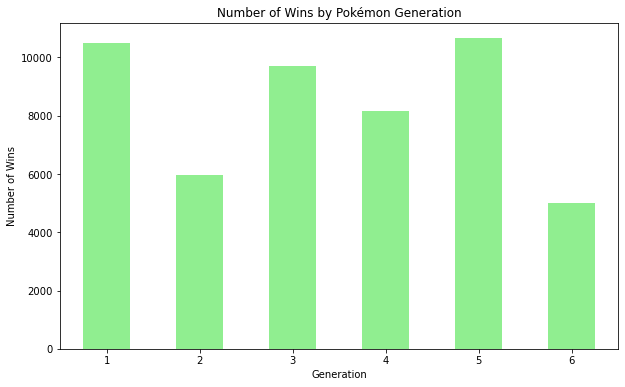

In [7]:
# Plot a bar graph for the number of wins by Pokémon generation
plt.figure(figsize=(10, 6))
wins_by_generation.plot(kind='bar', color='lightgreen')
plt.title('Number of Wins by Pokémon Generation')
plt.xlabel('Generation')
plt.ylabel('Number of Wins')
plt.xticks(rotation=0)
plt.show()


<Figure size 1440x720 with 0 Axes>

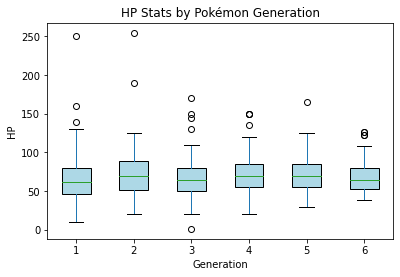

In [30]:
# Create a box plot for HP stats by generation
plt.figure(figsize=(20, 10))
pokemon_df.boxplot(column='HP', by='Generation', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('HP Stats by Pokémon Generation')
plt.suptitle('')  # Remove the default suptitle to keep the title clean
plt.xlabel('Generation')
plt.ylabel('HP')
plt.show()


<Figure size 1440x720 with 0 Axes>

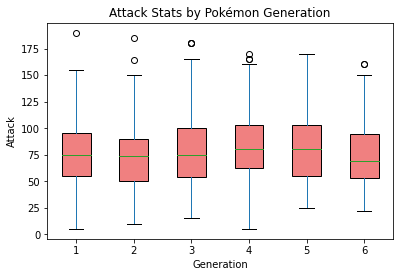

In [29]:
# Create a box plot for Attack stats by generation
plt.figure(figsize=(20, 10))
pokemon_df.boxplot(column='Attack', by='Generation', grid=False, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
plt.title('Attack Stats by Pokémon Generation')
plt.suptitle('')  # Remove the default suptitle to keep the title clean
plt.xlabel('Generation')
plt.ylabel('Attack')
plt.show()


<Figure size 1440x720 with 0 Axes>

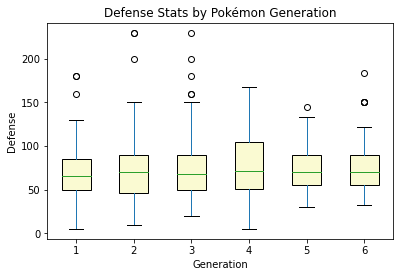

In [28]:
# Create a box plot for Defense stats by generation
plt.figure(figsize=(20, 10))
pokemon_df.boxplot(column='Defense', by='Generation', grid=False, patch_artist=True, boxprops=dict(facecolor='lightgoldenrodyellow'))
plt.title('Defense Stats by Pokémon Generation')
plt.suptitle('')  # Remove the default suptitle to keep the title clean
plt.xlabel('Generation')
plt.ylabel('Defense')
plt.show()


<Figure size 1440x720 with 0 Axes>

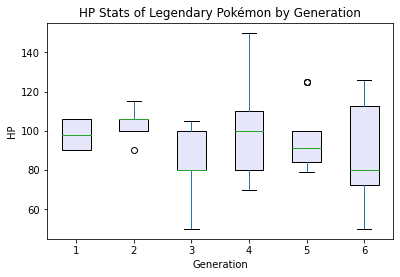

In [27]:
# Filter the dataset to only include Legendary Pokémon
legendary_pokemon_df = pokemon_df[pokemon_df['Legendary']]

# Create a box plot for HP stats of Legendary Pokémon by generation
plt.figure(figsize=(20, 10))
legendary_pokemon_df.boxplot(column='HP', by='Generation', grid=False, patch_artist=True, boxprops=dict(facecolor='lavender'))
plt.title('HP Stats of Legendary Pokémon by Generation')
plt.suptitle('')  # Remove the default suptitle to keep the title clean
plt.xlabel('Generation')
plt.ylabel('HP')
plt.show()


<Figure size 1440x720 with 0 Axes>

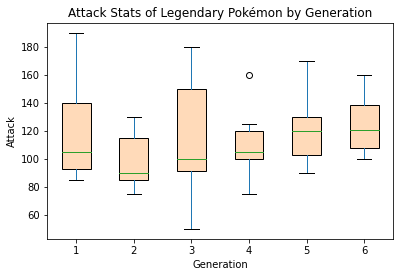

In [26]:
# Create a box plot for Attack stats of Legendary Pokémon by generation
plt.figure(figsize=(20, 10))
legendary_pokemon_df.boxplot(column='Attack', by='Generation', grid=False, patch_artist=True, boxprops=dict(facecolor='peachpuff'))
plt.title('Attack Stats of Legendary Pokémon by Generation')
plt.suptitle('')  # Remove the default suptitle to keep the title clean
plt.xlabel('Generation')
plt.ylabel('Attack')
plt.show()


<Figure size 1440x720 with 0 Axes>

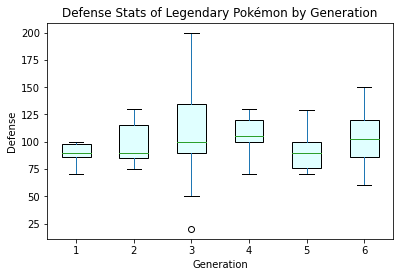

In [25]:
# Create a box plot for Defense stats of Legendary Pokémon by generation
plt.figure(figsize=(20, 10))
legendary_pokemon_df.boxplot(column='Defense', by='Generation', grid=False, patch_artist=True, boxprops=dict(facecolor='lightcyan'))
plt.title('Defense Stats of Legendary Pokémon by Generation')
plt.suptitle('')  # Remove the default suptitle to keep the title clean
plt.xlabel('Generation')
plt.ylabel('Defense')
plt.show()


<Figure size 1440x720 with 0 Axes>

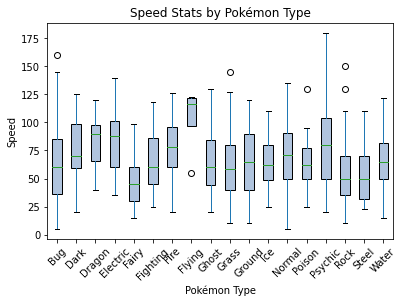

In [24]:
# Create a box plot for Speed stats by Pokémon type
plt.figure(figsize=(20, 10))
pokemon_df.boxplot(column='Speed', by='Type 1', grid=False, patch_artist=True, boxprops=dict(facecolor='lightsteelblue'))
plt.title('Speed Stats by Pokémon Type')
plt.suptitle('')  # Remove the default suptitle to keep the title clean
plt.xlabel('Pokémon Type')
plt.ylabel('Speed')
plt.xticks(rotation=45)
plt.show()


<Figure size 1008x504 with 0 Axes>

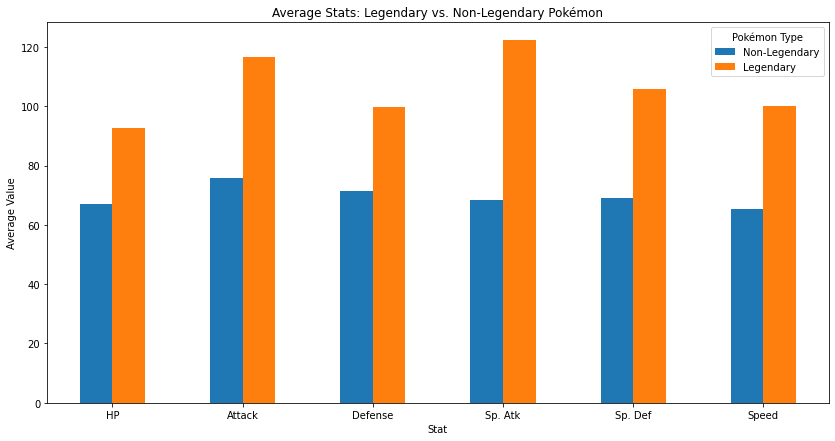

In [31]:
# Calculate average stats for Legendary and non-Legendary Pokémon
legendary_stats = pokemon_df.groupby('Legendary')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()

# Plot the average stats for Legendary vs. non-Legendary Pokémon
plt.figure(figsize=(14, 7))
legendary_stats.T.plot(kind='bar', figsize=(14, 7))
plt.title('Average Stats: Legendary vs. Non-Legendary Pokémon')
plt.xlabel('Stat')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(['Non-Legendary', 'Legendary'], title='Pokémon Type')
plt.show()
